In [80]:
#import libraries

In [81]:
import pandas as pd
import numpy as np
from keras.utils import np_utils
import matplotlib.pyplot as plt

In [82]:
#read dataset

In [83]:
dataset=pd.read_csv('C:/Users/Satyam/Desktop/AI/Iris.csv')

In [84]:
x=dataset.iloc[:,1:5].values
y=dataset.iloc[:,5].values

In [85]:
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [86]:
#one hot coding like 0 1 0,0 0 1

In [87]:
from sklearn.preprocessing import LabelEncoder

In [88]:
encoder=LabelEncoder()
y1=encoder.fit_transform(y)

In [89]:
y=pd.get_dummies(y1).values

In [90]:
#dividing the train and test data

In [91]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [92]:
print("shape of input - training set", x_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", y_test.shape)

shape of input - training set (120, 4)
shape of output - training set (120, 3)
shape of input - testing set (30, 4)
shape of output - testing set (30, 3)


In [93]:
#import cnn layers

In [94]:
from keras.models import Sequential 
from keras.layers import Activation, Dense

In [95]:
model=Sequential()

In [96]:
#use relu activation func in hidden layer ,easy and fast to compute

In [97]:
model.add(Dense(3,input_dim=4 ,activation = 'relu')) 
model.add(Dense(3, activation = 'softmax')) 

In [98]:
#use adam optimizer for compile

In [99]:
model.compile(optimizer="Adam", loss="mse", metrics=["accuracy"])

In [100]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 12        
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


In [101]:
#initial weight

In [102]:
print(model.get_weights())

[array([[ 0.7260548 , -0.76524746, -0.41103083],
       [ 0.893487  , -0.10683352, -0.82311845],
       [-0.1291613 , -0.7661553 ,  0.1127708 ],
       [ 0.69924796,  0.47941113, -0.03322488]], dtype=float32), array([0., 0., 0.], dtype=float32), array([[ 0.32944036, -0.7010348 ,  0.5042391 ],
       [ 0.11463857, -0.95229506,  0.4731238 ],
       [-0.47530532, -0.47796917, -0.2717042 ]], dtype=float32), array([0., 0., 0.], dtype=float32)]


In [103]:
#training a model on train data and updates the weight

In [104]:
history = model.fit(x_train, y_train, batch_size=10, epochs=500)

Epoch 1/500
12/12 [==============================] - 0s 1ms/step - loss: 0.2981 - accuracy: 0.3667
Epoch 2/500
12/12 [==============================] - 0s 1ms/step - loss: 0.2884 - accuracy: 0.3667
Epoch 3/500
12/12 [==============================] - 0s 1ms/step - loss: 0.2801 - accuracy: 0.3667
Epoch 4/500
12/12 [==============================] - 0s 1ms/step - loss: 0.2737 - accuracy: 0.3667
Epoch 5/500
12/12 [==============================] - 0s 1ms/step - loss: 0.2699 - accuracy: 0.3667
Epoch 6/500
12/12 [==============================] - 0s 1ms/step - loss: 0.2677 - accuracy: 0.3667
Epoch 7/500
12/12 [==============================] - 0s 1ms/step - loss: 0.2665 - accuracy: 0.3667
Epoch 8/500
12/12 [==============================] - 0s 1ms/step - loss: 0.2656 - accuracy: 0.3667
Epoch 9/500
12/12 [==============================] - 0s 2ms/step - loss: 0.2652 - accuracy: 0.3667
Epoch 10/500
12/12 [==============================] - 0s 1ms/step - loss: 0.2649 - accuracy: 0.3667
Epoch 11/

In [105]:
#graph between loss and accuracy

No handles with labels found to put in legend.


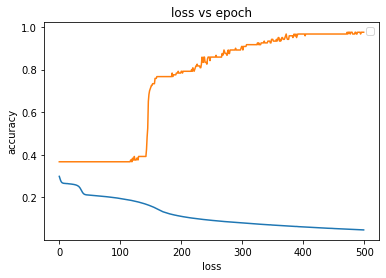

In [106]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.xlabel('loss')
plt.ylabel('accuracy')
plt.title('loss vs epoch')
plt.legend()
plt.show()

In [107]:
#updated weight

In [108]:
print(model.get_weights())

[array([[-0.22158714, -0.76524746, -0.41103083],
       [-0.5687517 , -0.10683352, -0.82311845],
       [ 0.9108313 , -0.7661553 ,  0.1127708 ],
       [ 2.8732994 ,  0.47941113, -0.03322488]], dtype=float32), array([-1.4608235,  0.       ,  0.       ], dtype=float32), array([[-1.1914247 ,  0.35598412,  1.0617431 ],
       [ 0.11463857, -0.95229506,  0.4731238 ],
       [-0.47530532, -0.47796917, -0.2717042 ]], dtype=float32), array([ 2.7006142 ,  0.79730356, -2.258303  ], dtype=float32)]


In [109]:
#evaluate accuracy and loss

In [110]:
result = model.evaluate(x_test, y_test)
print("test accuracy:", result[1]*100)

1/1 [==============================] - 0s 0s/step - loss: 0.0551 - accuracy: 0.9667
test accuracy: 96.66666388511658


In [111]:
y_pred=model.predict(x_test)

In [112]:
error=y_pred-y_test

In [113]:
print(error)

[[-1.3501900e-01  1.2894641e-01  6.0726218e-03]
 [ 2.3690000e-01 -3.5195500e-01  1.1505503e-01]
 [ 2.2375366e-02 -3.5647643e-01  3.3410096e-01]
 [-1.3501900e-01  1.2894641e-01  6.0726218e-03]
 [ 9.5679687e-05  2.1039429e-01 -2.1048999e-01]
 [ 5.8242907e-03 -4.7049832e-01  4.6467403e-01]
 [ 5.0965089e-05  1.7762238e-01 -1.7767334e-01]
 [-1.3501900e-01  1.2894641e-01  6.0726218e-03]
 [-1.3501900e-01  1.2894641e-01  6.0726218e-03]
 [ 1.7836819e-05  1.3261242e-01 -1.3263023e-01]
 [ 2.5599044e-02 -3.4674764e-01  3.2114866e-01]
 [-1.3501900e-01  1.2894641e-01  6.0726218e-03]
 [ 3.5721707e-05  1.6109893e-01 -1.6113466e-01]
 [ 1.2928981e-02 -4.0020502e-01  3.8727602e-01]
 [ 8.0637345e-03 -4.4126451e-01  4.3320075e-01]
 [-1.3501900e-01  1.2894641e-01  6.0726218e-03]
 [ 5.5359818e-02 -3.0341333e-01  2.4805351e-01]
 [ 7.6052831e-03 -4.4648588e-01  4.3888068e-01]
 [-1.3501900e-01  1.2894641e-01  6.0726218e-03]
 [-1.3501900e-01  1.2894641e-01  6.0726218e-03]
 [ 2.6784165e-02 -3.4358919e-01  3.16805

In [114]:
print(y_pred)

[[8.6498100e-01 1.2894641e-01 6.0726218e-03]
 [2.3690000e-01 6.4804500e-01 1.1505503e-01]
 [2.2375366e-02 6.4352357e-01 3.3410096e-01]
 [8.6498100e-01 1.2894641e-01 6.0726218e-03]
 [9.5679687e-05 2.1039429e-01 7.8951001e-01]
 [5.8242907e-03 5.2950168e-01 4.6467403e-01]
 [5.0965089e-05 1.7762238e-01 8.2232666e-01]
 [8.6498100e-01 1.2894641e-01 6.0726218e-03]
 [8.6498100e-01 1.2894641e-01 6.0726218e-03]
 [1.7836819e-05 1.3261242e-01 8.6736977e-01]
 [2.5599044e-02 6.5325236e-01 3.2114866e-01]
 [8.6498100e-01 1.2894641e-01 6.0726218e-03]
 [3.5721707e-05 1.6109893e-01 8.3886534e-01]
 [1.2928981e-02 5.9979498e-01 3.8727602e-01]
 [8.0637345e-03 5.5873549e-01 4.3320075e-01]
 [8.6498100e-01 1.2894641e-01 6.0726218e-03]
 [5.5359818e-02 6.9658667e-01 2.4805351e-01]
 [7.6052831e-03 5.5351412e-01 4.3888068e-01]
 [8.6498100e-01 1.2894641e-01 6.0726218e-03]
 [8.6498100e-01 1.2894641e-01 6.0726218e-03]
 [2.6784165e-02 6.5641081e-01 3.1680503e-01]
 [7.0070447e-03 5.4617363e-01 4.4681937e-01]
 [1.706179

In [115]:
x_test[1,:],y_pred[1]

(array([5.1, 2.5, 3. , 1.1]),
 array([0.2369    , 0.648045  , 0.11505503], dtype=float32))

In [116]:
y_pred_class=np.argmax(y_pred[1])

In [117]:
print(y_pred_class)

1


In [118]:
y_pred=model.predict(x_test)

y_test_class=np.argmax(y_test,axis=1)
y_pred_class=np.argmax(y_pred,axis=1)

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
